In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

All problems are worth 10 points.  

Problem 1) So, suppose we have a linear advection wave model, but now the wave speed varies in space, i.e. 
$$
\eta_{t} + c(x) \eta_{x} = 0, ~ \eta(x,0) = \eta_{0}(x).
$$

To solve this, we briefly introduce the method of characteristics.  The idea here is to imagine everything can be described via collections of essentially Lagrangian paths $x = x(t;x_{0})$.  Thus, we suppose our solution $\eta(x,t) = \eta(x(t;x_{0}),t)$, which means that 

$$
\frac{d\eta}{dt} = \eta_{x}\frac{dx}{dt} + \eta_{t}.
$$

Thus, using our equation above, we see that along characteristics, we have that 

$$
\frac{dx}{dt} = c(x), ~ \frac{d\eta}{dt} = 0.
$$

For $c(x) = \sin(x)$ and $c(x) = 1+x^2$, plot the characteristic curves in an $(x,t)$-plane and describe the impact of the varying speed on the propagation of an arbitrary initial condition. 

**Answer to Problem 1**

**i)**

For $c(x)=\sin(x)$ we need to solve

\begin{align}
\begin{cases}
\frac{dx}{dt}=\sin(x),\\
\frac{d\eta}{dt}=0
\end{cases}
\end{align}


Thus, let us deal with the first ODE

$$
\int\frac{1}{\sin(x)}dx=t+C,
$$

where $C$ is just a constant.


To solve $\int\frac{1}{\sin(x)}dx$, we take advantage of the trig identity

$$
\sin(x)=\frac{2\tan\left(\frac{x}{2}\right)}{1+\tan^{2}\left(\frac{x}{2}\right)}.
$$

Let $x=2\arctan(t)$ and therefore $t=\tan\left(\frac{x}{2}\right)$ and $dx=\frac{2}{1+t^{2}}dt$. Thus

$$
\sin(x)=\frac{2t}{1+t^{2}}.
$$

Therefore for our integral we have

\begin{align}
\int\frac{1}{\sin(x)}dx = \int \left(\frac{1+t^{2}}{2t}\right)\frac{2}{1+t^{2}}dt\\
\\
= \int \frac{1}{t}dt\\
\\
=\ln|t|\\
\\
=\ln\left|\tan\left(\frac{x}{2}\right)\right|
\end{align}


Therefore, we have

$$
\ln\left|\tan\left(\frac{x}{2}\right)\right|=t+C \longrightarrow \tan\left(\frac{x}{2}\right)=C_{1}e^{t}\longrightarrow x=2\arctan(C_{1}e^{t}),
$$

our given initial condtion is $x=x_{0}$ for $t=0$, so

$$
x_{0}=2\arctan(C_{1})\longrightarrow C_{1}=\tan\left(\frac{x_{0}}{2}\right)
$$

therefore, pluggin back our value for $C_{1}$ we get

$$
x=2\arctan\left(\tan\left(\frac{x_{0}}{2}\right)e^{t}\right)
$$

and therefore our characteristic curves are given by

$$
x_{0}=2\arctan\left(\tan\left(\frac{x}{2}\right)e^{-t}\right).
$$


For 
$$
\frac{d\eta}{dt}=0
$$

we have

$$
\eta=C_{2}
$$

for a constant $C_{2}$. Since at $t=0$, $\eta(x,0)=\eta_{0}(x)$, then $C_{2}=\eta_{0}$ and so

$$
\eta(x,t)= \eta_{0}(x)=\eta(x_{0}).
$$ 

Thus, our solution is of the form

$$
\eta(x,t) = \eta_{0}\left(2\arctan\left(\tan\left(\frac{x}{2}\right)e^{-t}\right)\right)
$$

We plot the characteristic curves.

In [2]:
t = np.linspace(-6,6,100)
et = np.exp(-t)
def f(x,t):
    return np.sin(x)

def char_plt(f,tf,dt):
    IC = np.linspace(-5,5,20)
    
    for ii in range(len(IC)):
        x = IC[ii]
        x0 = 2*np.arctan(np.tan(x/2)*et)
        plt.plot(x0,t)
        plt.xlabel('$x$')
        plt.ylabel('$t$')

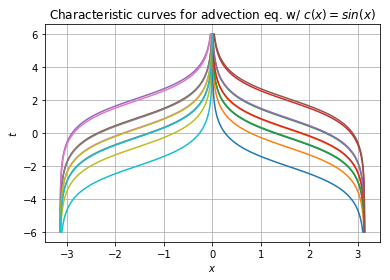

In [3]:
plt.grid()
plt.title('Characteristic curves for advection eq. w/ $c(x)=sin(x)$')
char_plt(f,6,1e-1)

Thus, we see that all characteristic curves tend to converge asymptotically towards $x=0$ as $t$ increases. Therefore, unlike the case when the wave speed is constant in space, in this case we see that the propagation of arbitrary initial conditions is symmetrical over $x=0$.

**ii)**

Now for the case $c(x)=1+x^{2}$. So,

$$
\int\frac{1}{1+x^{2}}=t+C
$$

for a constant $C$. Then, let $x=\tan(\theta)$, thus $dx=\frac{1}{\cos^{2}(\theta)}$ and we get

\begin{align}
\int\frac{1}{1+\frac{\sin^{2}(\theta)}{\cos^{2}(\theta)}}\left(\frac{1}{\cos^{2}(\theta)}\right)d\theta\\
\\
= \int\frac{1}{\cos^{2}(\theta)+\sin^{2}(\theta)}d\theta\\
\\
= \int d\theta\\
\\
=\theta
\end{align}

Then, since $x=\tan(\theta)\rightarrow\theta=\arctan(x)$, which means

$$
\arctan(x)=t+C \longrightarrow x=\tan(t+C)
$$

plugging our initial condition $x=x_{0}$ at $t=0$

$$
x_{0}=tan(C)\longrightarrow C=\arctan(x_{0}),
$$

thus

$$
x=\tan(t+\arctan(x_{0}))
$$

and our characteristic curves are given by

$$
x_{0}=\tan(\arctan(x)-t).
$$


For our solution, using the same reasoning as above, we have

$$
\eta(x,t)=\eta_{0}(\tan(\arctan(x)-t))
$$


We plot the characteristic curves.

In [45]:
t = np.linspace(-6,6,100)
def f(x,t):
    return 1 + x**2

def char_plt2(f,tf,dt):
    IC = np.linspace(-5,5,10)
    
    for ii in range(len(IC)):
        x = IC[ii]
        x0 = np.tan(np.arctan(x) - t)
        plt.plot(x0,t)
        plt.xlabel('$x$')
        plt.ylabel('$t$')

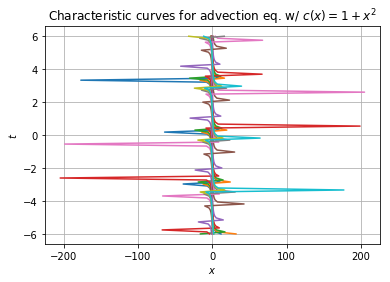

In [46]:
plt.grid()
plt.title('Characteristic curves for advection eq. w/ $c(x)=1+x^{2}$')
char_plt2(f,6,1e-1)

Thus, our characteristic curves tend to oscillate, with diverse amplitudes, around $x=0$.

Problem 2) In the free-surface problem, one of the nonlinear equations at the surface is 

$$
\eta_{t} = -\eta_{x}\phi_{x} -\eta_{y}\phi_{y} + \phi_{z}, ~ z = \eta(x,y,t).
$$

Show that this can be re-written as 

$$
\eta_{t} = \sqrt{1 + \left|\left|\nabla \eta\right|\right|^{2}}\partial_{\hat{{\bf n}}}\phi,
$$

where $\partial_{\hat{{\bf n}}}$ denotes the normal derivative to the surface $F(x,y,z,t) = z - \eta(x,y,t) = 0$.  

**Solution to Problem 2**

We have

$$
\eta_{t} = -\eta_{x}\phi_{x} -\eta_{y}\phi_{y} + \phi_{z},
$$

which we can re-write as

$$
\eta_{t} = \nabla\phi ~ \cdot <-\eta_{x},-\eta_{y},1>.
$$

We see that

$$
\nabla(z-\eta) = <-\eta_{x},-\eta_{y},1>
$$

then

$$
\eta_{t} = \nabla\phi\cdot\nabla(z-\eta).
$$

Since we know that the gradient vector is always orthogonal to the surface, then we can re-write

$$
\nabla(z-\eta)=||\nabla(z-\eta)||{\bf \hat{n}},
$$

where ${\bf \hat{n}}$ is the normal vector to the surface $(z-\eta)$. Thus

\begin{align}
\eta_{t} = \nabla\phi\cdot||\nabla(z-\eta)||{\bf \hat{n}}\\
= ||\nabla(z-\eta)||(\nabla\phi\cdot{\bf \hat{n}})
\end{align}

and, since 

$$
||\nabla(z-\eta)||=\sqrt{1+\eta_{x}^{2}+\eta_{y}^{2}}=\sqrt{1+||\nabla\eta||^{2}},
$$

and 

$$
\nabla\phi\cdot{\bf \hat{n}}=\partial_{{\bf \hat{n}}}\phi,
$$

then

$$
\eta_{t} = \sqrt{1+||\nabla\eta||^{2}}\partial_{{\bf \hat{n}}}\phi
$$

which is the desired result.

Problem 3) For the free-surface problem without surface tension, show that the quantity

$$
H(t) = \frac{1}{2}\int_{\mathbb{R}^{2}}\int_{-h}^{\eta(x,y,t)} \left|\nabla \phi \right|^{2}dz dx dy + \frac{g}{2}\int_{\mathbb{R}^{2}}\eta^{2}(x,y,t) dx dy
$$

is a constant in time.  Note, some basic facts about differentiating integrals from advanced calc will be necessary.  You will also need to use Green's first identity to deal with the term

$$
\int_{\mathbb{R}^{2}}\int_{-h}^{\eta(x,y,t)}  \nabla \phi \cdot \nabla \phi_{t} dz dx dy.
$$

**Solution to Problem 3**

Let us differentiate the integral with respect to time. To simplify our notation let $\eta(x,y,t)=\eta$; we get

$$
\frac{dH}{dt}=\frac{1}{2}\int_{\mathbb{R}^{2}}|\nabla\phi|^{2}\eta_{t}dxdy+\int_{\mathbb{R}^{2}}\int_{-h}^{\eta}\nabla\phi\cdot\nabla\phi_{t}dzdxdy + g\int_{\mathbb{R}^{2}}\eta\eta_{t}dxdy.
$$

To deal with 

$$
\int_{\mathbb{R}^{2}}\int_{-h}^{\eta}\nabla\phi\cdot\nabla\phi_{t}dzdxdy
$$

we apply Green's First Identity, which yields

$$
\int_{\mathbb{R}^{2}}\int_{-h}^{\eta}\nabla\phi\cdot\nabla\phi_{t}dzdxdy = \int_{\mathbb{R}^{2}}\phi_{t}\nabla\phi\cdot\hat{\bf n}d{\bf S} -\int_{\mathbb{R}^{2}}\int_{-h}^{\eta}\phi_{t}\Delta\phi dxdydz.
$$

Since, for the free-surface problem, we have $\Delta\phi=0$, then the last integral is $0$ as well and we are left with

\begin{align}
\int_{\mathbb{R}^{2}}\int_{-h}^{\eta}\nabla\phi\cdot\nabla\phi_{t}dzdxdy = \int_{\mathbb{R}^{2}}\phi_{t}\nabla\phi\cdot\hat{\bf n}d{\bf S}\\
=\int_{\mathbb{R}^{2}}\phi_{t}\partial_{\hat{\bf n}}\phi d{\bf S},
\end{align}

where $\partial_{\hat{\bf n}}\phi$ is the normal derivative of $\phi$. As we do not have a normal component of the flow at $z=-h$, we focus our attention on the surface $z=\eta(x,y,t)$. Thus, in absence of surface tension, we know that 

$$
\phi_{t}+\frac{1}{2}|\nabla\phi|^{2}+g\eta=0, ~ z=\eta
$$

$$
\Rightarrow \phi_{t}=-\frac{1}{2}|\nabla\phi|^{2}-g\eta;
$$

substituting into our integral yields

$$
\int_{\mathbb{R}^{2}}\phi_{t}\partial_{\hat{\bf n}}\phi d{\bf S} =-\frac{1}{2}\int_{\mathbb{R}^{2}}|\nabla\phi|^{2}\partial_{\hat{\bf n}}\phi d{\bf S}-g\int_{\mathbb{R}^{2}}\eta\partial_{\hat{\bf n}}\phi d{\bf S}.
$$

So, our derivative becomes

$$
\frac{dH}{dt} = \frac{1}{2}\int_{\mathbb{R}^{2}}|\nabla\phi|^{2}\eta_{t}dxdy -\frac{1}{2}\int_{\mathbb{R}^{2}}|\nabla\phi|^{2}\partial_{\hat{\bf n}}\phi d{\bf S}-g\int_{\mathbb{R}^{2}}\eta\partial_{\hat{\bf n}}\phi d{\bf S}. + ~ g\int_{\mathbb{R}^{2}}\eta\eta_{t}dxdy
$$

So, since we are integrating at the surface $z=\eta$, then our $d{\bf S}=\sqrt{1+||\nabla\eta||^{2}}dxdy$. 
Also, $\eta_{t} = \sqrt{1+||\nabla\eta||^{2}}\partial_{{\bf \hat{n}}}\phi$, which implies $\partial_{{\bf \hat{n}}}\phi=\frac{\eta_{t}}{\sqrt{1+||\nabla\eta||^{2}}}$. When the algebra and the dust settle, we can re-write our integral as

\begin{align}
\frac{dH}{dt} = \frac{1}{2}\int_{\mathbb{R}^{2}}|\nabla\phi|^{2}\eta_{t}dxdy -\frac{1}{2}\int_{\mathbb{R}^{2}}|\nabla\phi|^{2}\eta_{t}dxdy-g\int_{\mathbb{R}^{2}}\eta\eta_{t}dxdy + ~ g\int_{\mathbb{R}^{2}}\eta\eta_{t}dxdy\\
= 0
\end{align}

Therefore since $\frac{dH}{dt}=0$, then $H(t)$ is constant with respect to time.

Problem 4) For integrals of the form 

$$
I(t) = \int_{a}^{b} f(k) e^{i\omega(k)t}dk,
$$

the Method of Stationary Phase gave us a means of approximating integrals of this type when in the interval one has a critical point of the phase, i.e. a point $k_{\ast}\in(a,b)$ such that $\omega'(k_{\ast})=0$.  We tacitly assumed that $\omega''(k_{\ast})\neq 0$.  Derive an approximation formula supposing that $\omega'(k_{\ast})=\omega''(k_{\ast})=0$, but $\omega'''(k_{\ast})\neq0$.  Note, you will need to use

$$
\int_{\mathbb{R}}e^{ik^{3}}dk = 2\int_{0}^{\infty}e^{-k^{3}}dk = 2\tilde{c},
$$

since that last integral is not readily computable, at least not directly. 

**Solution to Problem 4**

Since we know that the second and third derivative of $\omega(k)$ vanish at $k_{\ast}$, we focus our attention on a small neighborhood of $k_{\ast}$. Using the Method of Stationary Phase and the machinery built thanks to the Riemann-Lebesgue lemma, we write

$$
I(t)=\int_{k_{\ast}-\epsilon}^{k_{\ast}+\epsilon}f(k)e^{it\omega(k)}dk + \mathcal{O\left(\frac{1}{t}\right)},
$$

where we for a small enough $\epsilon$. Then, we Taylor-expand the integral around $k_{\ast}$ taking into account that $\omega'(k_{\ast})=\omega''(k_{\ast})=0$ and thus we get

\begin{align}
I(t)\approx\int_{k_{\ast}-\epsilon}^{k_{\ast}+\epsilon}f(k)e^{it(\omega(k_{\ast})+\frac{1}{6}\omega'''(k_{\ast})(k-k_{\ast})^{3})}dk\\
\approx
e^{it\omega(k_{\ast})}\int_{-\epsilon}^{+\epsilon}f(k_{\ast}+k)e^{it(\omega'''(k_{\ast})(k)^{3}/6)}dk
\end{align}

which makes sense as we expect the major contribution to arrive from a small neighborhood around $k_{\ast}$. Rescaling

$$
\tilde{k}=\left(\frac{|\omega'''|t}{6}\right)^{1/3}k
$$

$$
\Rightarrow I(t)\approx\left(\frac{6}{|\omega'''(k_{\ast})|t}\right)^{1/3}e^{it\omega(k_{\ast})}\int_{-\epsilon\left(\frac{|\omega'''(k_{\ast})|t}{6}\right)^{1/3}}^{\epsilon\left(\frac{|\omega'''(k_{\ast})|t}{6}\right)^{1/3}}f\left(k_{\ast}+\left(\frac{6}{|\omega'''(k_{\ast})|t}\right)^{1/3}k\right)e^{isgn(\omega'''(k_{\ast}))k^{3}}dk.
$$

In the limit for $t\rightarrow \infty$, we have $f\left(k_{\ast}+\left(\frac{6}{|\omega'''(k_{\ast})|t}\right)^{1/3}k\right)=f(k_{\ast})$ and constant. Therefore, adjusting our limits of integration accordingly, we get

$$
I(t)\approx\left(\frac{6}{|\omega'''(k_{\ast})|t}\right)^{1/3}e^{it\omega(k_{\ast})}f(k_{\ast})\int_{-\infty}^{\infty}e^{isgn(\omega'''(k_{\ast}))k^{3}}dk.
$$

Since $\omega'''(k_{\ast})\neq0$ then $sgn(\omega'''(k_{\ast}))=\pm1$. Using 

$$
\int_{\mathbb{R}}e^{ik^{3}}dk = 2\int_{0}^{\infty}e^{-k^{3}}dk = 2\tilde{c},
$$

we finally have

$$
I(t)\approx 2\tilde{c}\left(\frac{6}{|\omega'''(k_{\ast})|t}\right)^{1/3}e^{it\omega(k_{\ast})}f(k_{\ast}) + \mathcal{O}\left(\frac{1}{t}\right)
$$